## Question 1

Let's assume that this given algorithm generates an event that can be portrayed by the random variable X. $\\$

$\hspace{5cm}$ $\mathbb{P}$($X=1$) = $\mathbb{P}$($C_2=1$)$\mathbb{P}$($C_1=1$) $\\$

$\hspace{5cm}$ $\Rightarrow$ $\hspace{1cm}$  $\mathbb{P}$($X=1$) = $\frac{p_y c_y}{c_y + c_x}$  $\\$

This shows that the given algoritm works as a : $\mathbb{Bern}$ ~ $\left(\frac{p_y c_y}{c_y + c_x}\right)$  $\\$
We can also verify this by checking : $\mathbb{P}$($X=0$) = 1 - $\frac{p_y c_y}{c_y + c_x}$ $\\$

From these arguments we can concur that the probability distribution of getting an ouput will be : $\mathbb{Bern}$ ~ $\left(\frac{p_y c_y + p_x c_x}{c_y + c_x}\right)$ $\\$

Now, for the number of iterations to get an output :  $\mathbb{N}$ = $\left(\frac{1}{P}\right)$ = $\left(\frac{c_y + c_x}{p_y c_y + p_x c_x}\right)$ $\\$

Now lets simulate this :

In [1]:
global const iter = Ref{Float64}(0.0)
iter[] = 1
function Bern(py,px,cy,cx)
    u1 = rand()
    if u1<(cy/(cy+cx))
        u2 = rand()
        if u2<py
            return 1
        else
            iter[]= iter[] + 1.0
            return Bern(py,px,cy,cx)
        end
    else
        u2 = rand()
        if u2<px
            return 0
        else
            iter[]= iter[] + 1.0
            return Bern(py,px,cy,cx)
        end
    end
end

Bern (generic function with 1 method)

In [6]:
distribution = []
iterations = []
sum = 0
sum2 = 0
tot = 1000000
py = 0.4
px = 0.6
cy = 15
cx = 20
for i in 1:tot
  iter[] = 1.0
  val = Bern(py,px,cy,cx)
  push!(distribution,val) 
  push!(iterations,iter)  
  sum+=val
  sum2 = sum2 + iter[]
  #var += val*val
  #print(" ",val)
end
##variance = var/tot - (sum/tot)^2
print("Experimental value of p in Bern(p) = ",sum/tot)
print("\nTheoretical value of p in Bern(p) = ",(py*cy)/(py*cy + px*cx))
print("\nExperimental value of iterations to get an output = ",sum2/tot)
print("\nTheoretical value of iterations to get an output = ",(cy + cx)/(py*cy + cx*px))





Experimental value of p in Bern(p) = 0.333234
Theoretical value of p in Bern(p) = 0.3333333333333333
Experimental value of iterations to get an output = 1.944063
Theoretical value of iterations to get an output = 1.9444444444444444

## Question 2

I have used 2 functions gamma(k) and sample_sphere to accomplish the answer. The below 3 cells show the code and visualizations required . Also I have run it for p=3 and you can also see the graph for it by running the below cells.


In [4]:
function gamma(k)
    prod=1
    if k==1
        return 1
    elseif k==0.5
        return pi^0.5
    else
        return (k-1)*gamma(k-1)
    end
end
function sample_sphere(p)
    c = ((2^p)/pi^(p/2))*gamma((p/2)+1)
    while true
        arr = []
        for i in 1:p
            x = -1+2*rand()
            push!(arr,x)
        end
        sum=0
        for i in 1:length(arr)
            sum += arr[i]^2
        end
        if sum<1 && sum<1
            return arr
            break
        else
            continue
        end
    end
end    
using Statistics


Expermental value of x and y through the distribution = 0.0027323136276621346 and -0.0002658509160346476Theoretical value of x and y through the distribution = 0.0027323136276621346 and -0.0002658509160346476

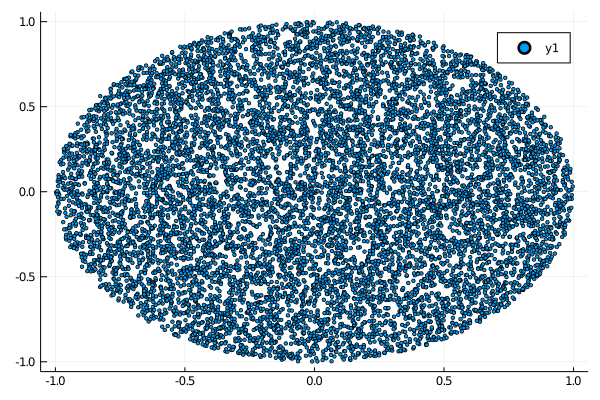

In [5]:
tot=10000
distribution_x = []
distribution_y = []
for i in 1:tot
    val = sample_sphere(2)
    push!(distribution_x,val[1])
    push!(distribution_y,val[2])  
end
print("Expermental value of x and y through the distribution = ",mean(distribution_x)," and ",mean(distribution_y))
print("Theoretical value of x and y through the distribution = ",mean(distribution_x)," and ",mean(distribution_y))
#plot(distribution,x=:Values, kind="histogram")
using Plots
plot(distribution_x,distribution_y,seriestype=:scatter,markersize=2)

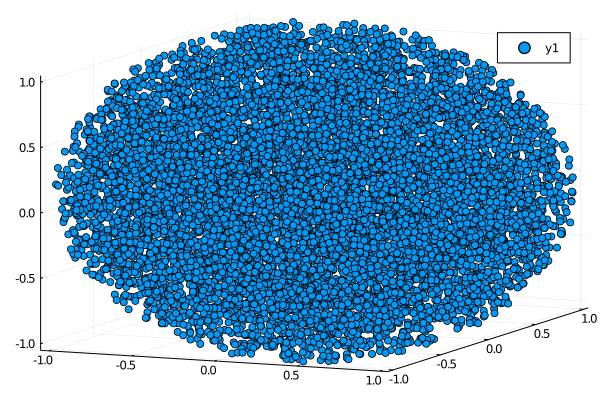

In [9]:
tot=10000
distribution_x = []
distribution_y = []
distribution_z = []
for i in 1:tot
    val = sample_sphere(3)
    push!(distribution_x,val[1])
    push!(distribution_y,val[2])  
    push!(distribution_z,val[3])  
end

using Plots
plot(scatter(distribution_x,distribution_y,distribution_z),seriestype=:scatter)


## Question 3

So to solve this question I have first made program to sample from cauchy and then use that as proposal in accept reject for standard normal sampler. Using that sampler I use accept reject to sample from the truncated standard normal distribution given in the question.

In [10]:
function pdf_stnd_normal(x)
    return exp(-1*(x^2)/2)/(2*pi)^0.5
end
function cauchy(x)
    return 1/(pi*(1+x^2))
end

cauchy (generic function with 1 method)

In [11]:
function sample_cauchy()
    x = rand()
    return tan(pi*(x-0.5))
end
function sample_stnd_normal()
    c = ((2*pi)^0.5)*exp(-0.5) + 0.1
    while true
        x = sample_cauchy()
        y = rand()
       ratio = pdf_stnd_normal(x)/c*cauchy(x)
        if y<ratio
            return x
            break
        else
            continue
        end
    end
end    

sample_stnd_normal (generic function with 1 method)

Expectation = -0.0002645018747538448
Variance = 0.31060850980512916

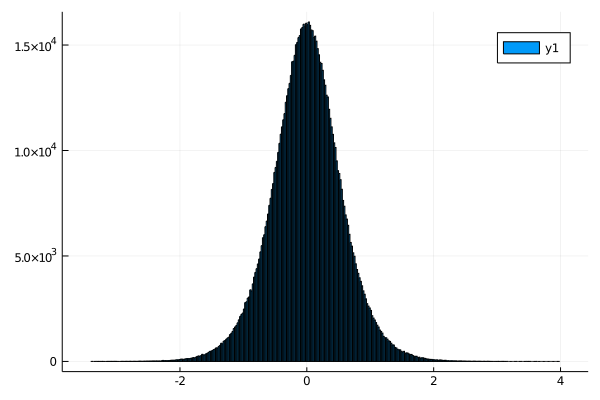

In [12]:
distribution = []

sum = 0
var = 0
tot = 1000000
for i in 1:tot
  val = sample_stnd_normal()
  push!(distribution,val)  
  sum+=val
  var += val*val
  #print(" ",val)
end
variance = var/tot - (sum/tot)^2
print("Expectation = ",sum/tot)
print("\nVariance = ",variance)
plot(histogram(distribution))

In [13]:
function sample_q3(a)
    while true
        x = sample_stnd_normal()
        if x<a && x>-1*a
            return x
            break
        else
            continue
        end
    end
end    

sample_q3 (generic function with 1 method)

Experimental Expectation = 0.00027462884484188266
Theoretical Expectation = 0
Expermintal Variance = 0.3113820964463026

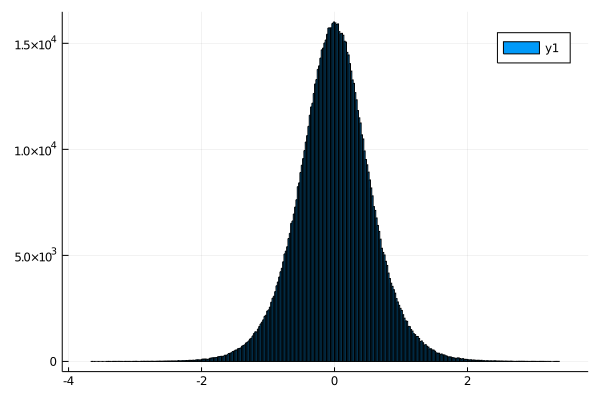

In [20]:
distribution = []

sum = 0
var = 0
tot = 1000000
for i in 1:tot
  val = sample_q3(4)
  push!(distribution,val)  
  sum+=val
  var += val*val
  #print(" ",val)
end
variance = var/tot - (sum/tot)^2
print("Experimental Expectation = ",sum/tot)
print("\nTheoretical Expectation = ",0)
print("\nExpermintal Variance = ",variance)
#plot(distribution,x=:Values, kind="histogram")
plot(histogram(distribution))

Experimental Expectation = -0.00022654526398240587
Theoretical Expectation = 0
 Experimental Variance = 0.19263356019780725

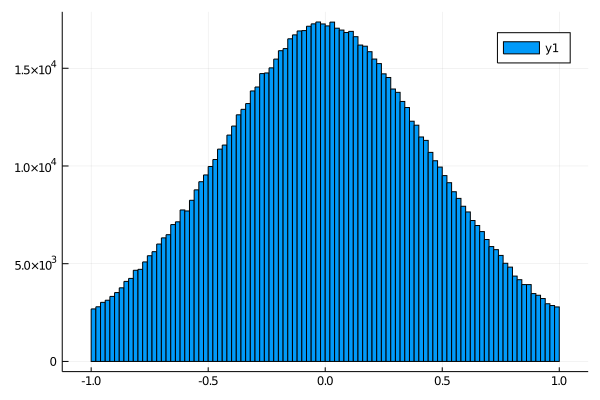

In [21]:
distribution = []

sum = 0
var = 0
tot = 1000000
for i in 1:tot
  val = sample_q3(1)
  push!(distribution,val)  
  sum+=val
  var += val*val
  #print(" ",val)
end
variance = var/tot - (sum/tot)^2
print("Experimental Expectation = ",sum/tot)
print("\nTheoretical Expectation = ",0)
print("\n Experimental Variance = ",variance)
#plot(distribution,x=:Values, kind="histogram")
plot(histogram(distribution))

As we decrease a towards 0 the variance goes to zero. Same is the difference between the two settings that is for $a=1$ and $a=4$